The aim of this script is to refresh how to filter a pandas dataframe created from a csv file

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px


In [ ]:

usaFemPop = pd.read_csv("../assets/data/population.csv")
filteredDf = usaFemPop[(usaFemPop['cntry'] == 'USA') & (usaFemPop['sex'] == 'female')]
filteredDf.reset_index(drop=True).head()


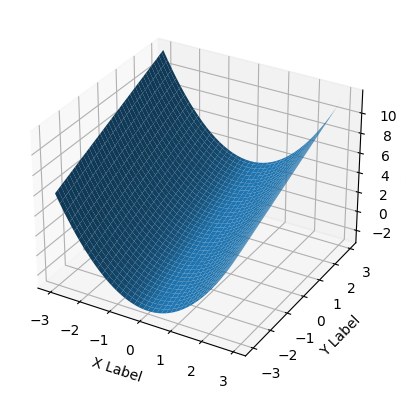

In [10]:
# https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444

import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Can I produce the same plot using plotly go?

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = X, y = Y, z=Z)])

fig.update_layout(title='Will this work?', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=40)
                  )

fig.show()

Now let's try the same but with the filtered data

In [24]:
microFilteredDf = filteredDf.loc[

        (filteredDf['age'].between(0, 20)) & 
        (filteredDf['year'].between(1990, 2010)),
        :    
    ][['year', 'age', 'population_count']].reset_index()

microFilteredDf

,index,year,age,population_count
0,1219779,1990,0,1933948.890
1,1219782,1990,1,1860037.720
2,1219785,1990,2,1815878.690
3,1219788,1990,3,1793479.770
4,1219791,1990,4,1805014.880
...,...,...,...,...
436,1226487,2010,16,2096523.330
437,1226490,2010,17,2125696.660
438,1226493,2010,18,2178608.760
439,1226496,2010,19,2230845.820


In [29]:
min_year = microFilteredDf['year'].min()
max_year = microFilteredDf['year'].max()

min_year, max_year


(0, 20)

In [30]:

min_age = microFilteredDf['age'].min()
max_age = microFilteredDf['age'].max()

min_age, max_age

(0, 20)

In [32]:
np.arange(min_age, max_age)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [33]:
np.arange(min_year, max_year)

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

In [45]:
def getCoordinateValue(year, age):
    df = microFilteredDf
    return df.loc[
        (df['year'] == year) &
        (df['age'] == age)
    ]['population_count'].iloc[0]

In [46]:
# Let's try this...

getCoordinateValue(1995, 14)

1871478.28

In [64]:
pop_array = microFilteredDf[
        ['age', 'year', 'population_count']
    ].pivot(
        index='year', columns = 'age', values = 'population_count'
    )

pop_array = np.array(pop_array)

pop_array


array([[1933948.89 , 1860037.72 , 1815878.69 , 1793479.77 , 1805014.88 ,
        1784606.565, 1762207.37 , 1770599.12 , 1710710.25 , 1800558.76 ,
        1785433.48 , 1709778.075, 1661588.095, 1640120.2  , 1613718.885,
        1612521.11 , 1615233.085, 1680232.09 , 1766917.47 , 1964464.405,
        1967567.37 ],
       [1950319.605, 1914853.79 , 1865286.84 , 1822854.375, 1822892.055,
        1808627.08 , 1788190.49 , 1773458.11 , 1718527.005, 1826823.46 ,
        1819724.535, 1772147.135, 1720502.66 , 1685077.245, 1655591.26 ,
        1635832.42 , 1624416.785, 1650907.325, 1678139.6  , 1875195.28 ,
        1957266.795],
       [1934829.305, 1937968.945, 1918671.725, 1874963.29 , 1855649.615,
        1827294.52 , 1813495.68 , 1801854.1  , 1728548.6  , 1832037.465,
        1847114.75 , 1812300.21 , 1787413.25 , 1745729.78 , 1703326.315,
        1680068.45 , 1649456.49 , 1659034.655, 1652443.73 , 1779204.01 ,
        1866843.425],
       [1902980.21 , 1926529.56 , 1943046.965, 1931649.57 

In [65]:
# Now let's try to plot this as a 3D surface 

fig = go.Figure(data=[go.Surface(z=pop_array)])

fig.update_layout(title='Will THIS work?', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=40)
                  )

fig.show()

In [66]:
# Excellent. Now for the whole data 

pop_array = filteredDf[
        ['age', 'year', 'population_count']
    ].pivot(
        index='year', columns = 'age', values = 'population_count'
    )

pop_array = np.array(pop_array)

pop_array

fig = go.Figure(data=[go.Surface(z=pop_array)])

fig.update_layout(title='Will THIS work?', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=40)
                  )

fig.show()
